In [1]:
import pandas as pd
import numpy as np
import missingno as miss
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\Naman\AppData\Local\Temp\ipykernel_7584\3220620043.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reading Data

In [2]:
train = pd.read_csv('A:\\gibots\\train.csv')

In [3]:
# getting the train data

train.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


# Performing Data cleaning and EDA

In [4]:
# Checking for missing-values

train.isna().sum()

id         0
x1      1426
x2      1426
x3      1426
x4      1426
        ... 
x141       0
x142       0
x143       0
x144       0
x145       0
Length: 146, dtype: int64

<Axes: >

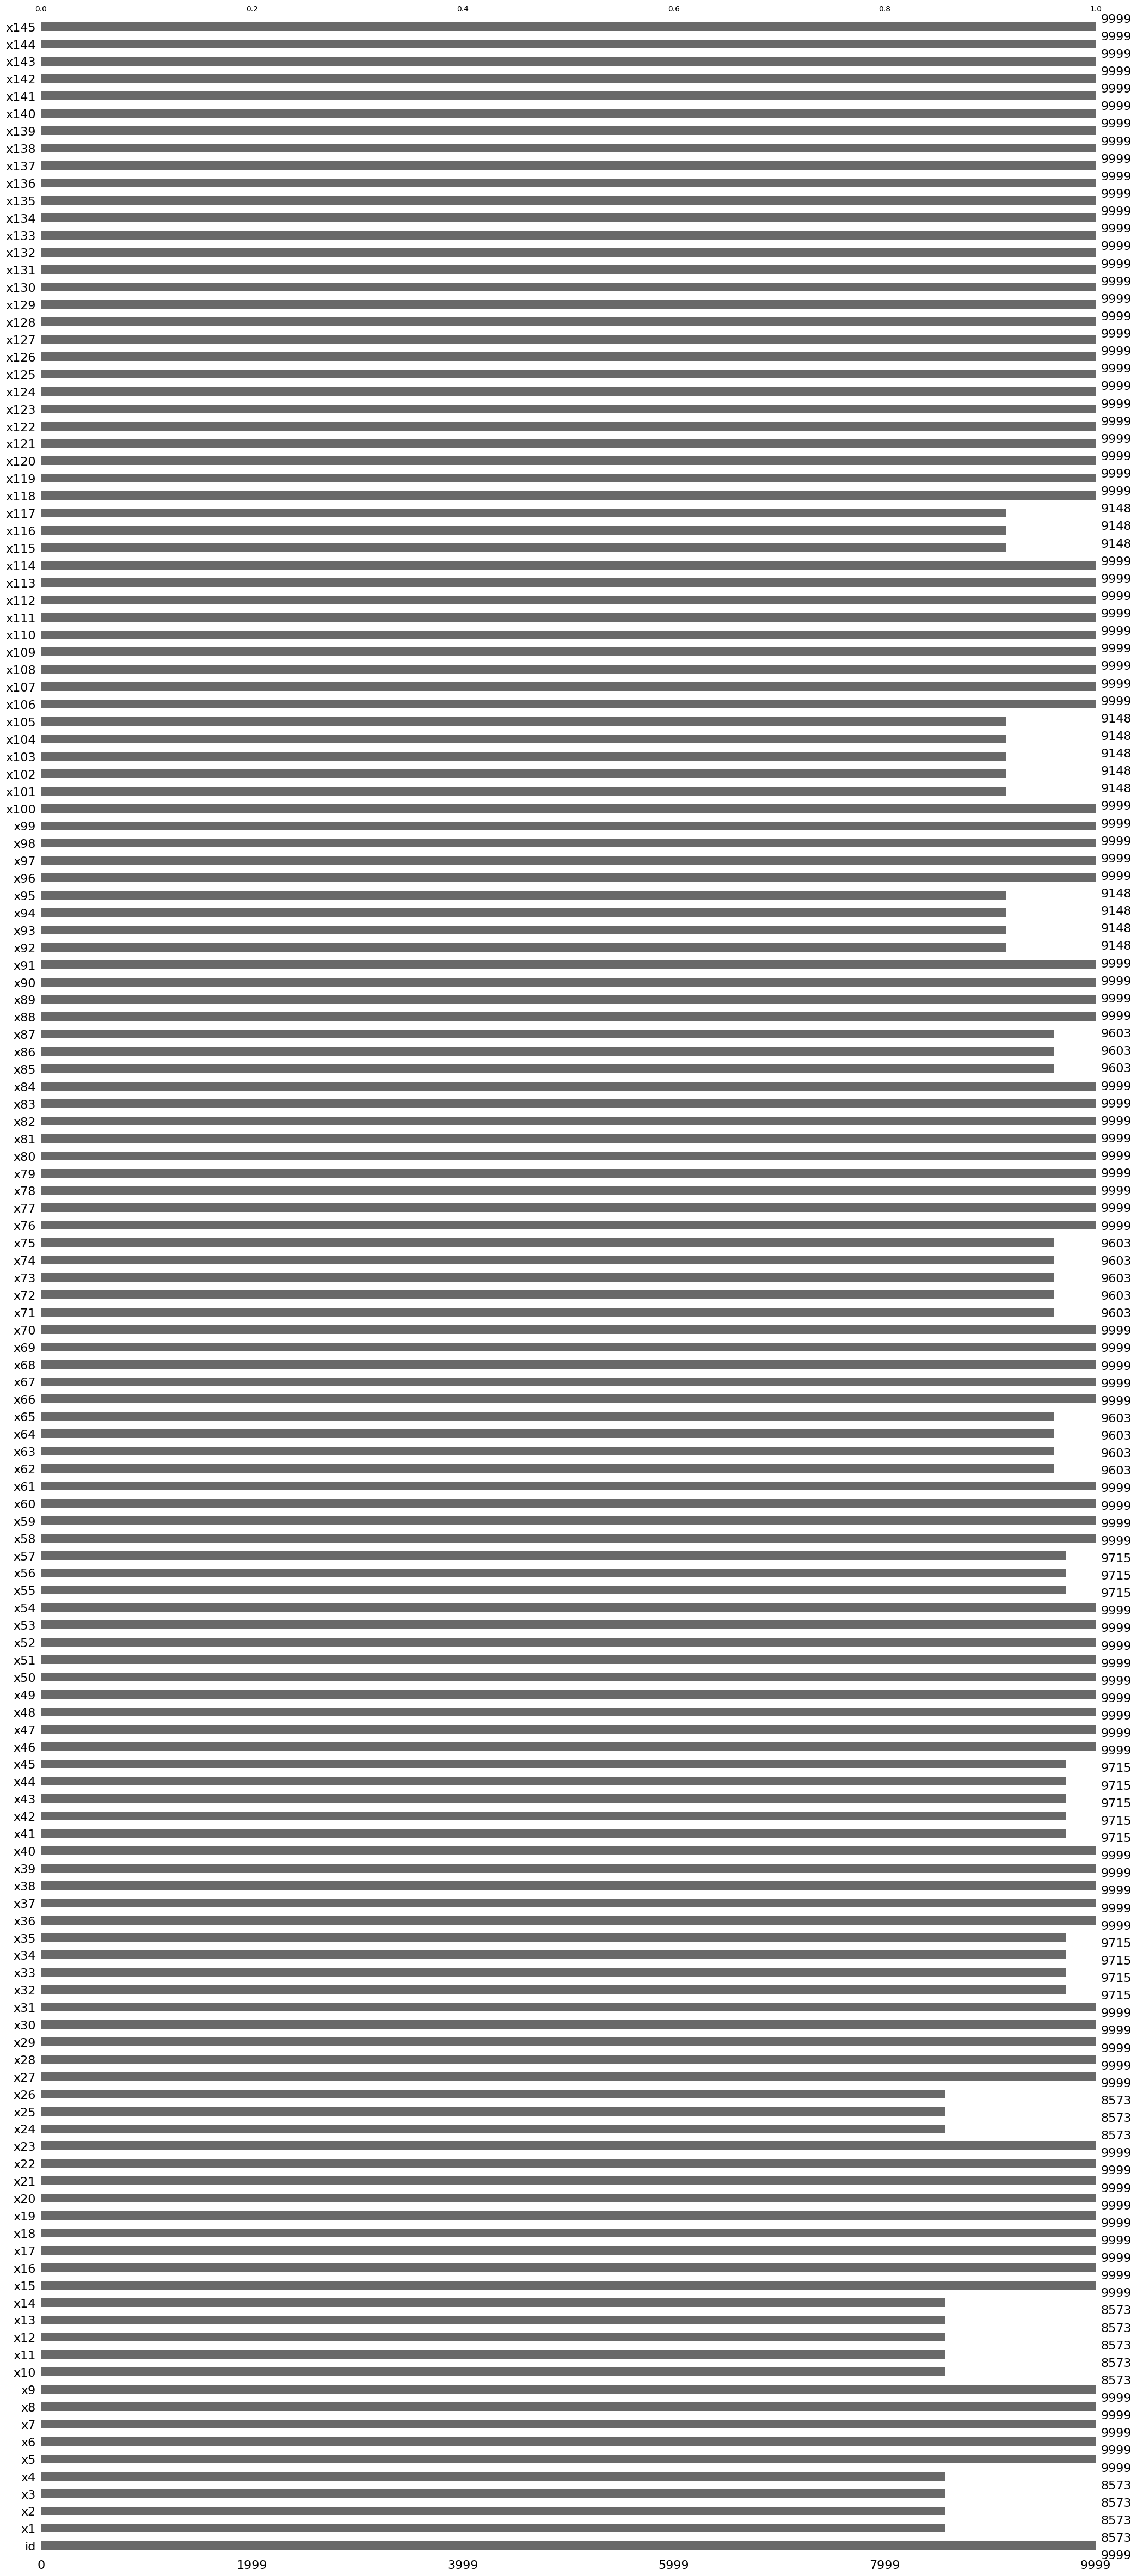

In [5]:
miss.bar(train)

In [6]:
# getting numeric features from train data...

num_df = train.select_dtypes(exclude=['object'])
num_df.head()

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
0,1,0.576561,0.073139,0.481394,0.115697,0.472474,42,0.396065,3,6,...,5,6,0.987596,0.0,0.810,3306,4676,2,0.375535,0.464610
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,...,4,6,0.968240,0.0,0.510,4678,3306,4,0.741682,0.593630
2,3,1.341803,0.051422,0.935572,0.041440,0.501710,2,0.838475,3,5,...,3,5,0.966122,0.0,0.850,4678,3306,1,0.776467,0.493159
3,4,0.653912,0.041471,0.940787,0.090851,0.556564,37,0.127405,8,15,...,17,15,0.927550,0.0,0.945,3306,4678,3,0.168234,0.546582
4,5,1.415919,0.000000,1.000000,0.000000,0.375297,1,0.523543,4,11,...,11,11,0.900224,0.0,1.000,1263,892,1,0.246637,0.361045


In [7]:
# getting categorical features from train data...

cat_df = train.select_dtypes(include=['object'])
cat_features = train.select_dtypes(include=['object']).columns
cat_features

Index(['x1', 'x2', 'x3', 'x4', 'x10', 'x11', 'x12', 'x13', 'x14', 'x24', 'x25',
       'x26', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x55', 'x56', 'x57', 'x61', 'x62', 'x63', 'x64', 'x65',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x85', 'x86', 'x87', 'x91', 'x92',
       'x93', 'x94', 'x95', 'x101', 'x102', 'x103', 'x104', 'x105', 'x115',
       'x116', 'x117', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140', 'x141',
       'x142'],
      dtype='object')

In [8]:
cat_df.shape

(9999, 60)

In [9]:
print(f'We have {len(cat_features)} categorical features.')

We have 60 categorical features.


In [10]:
# updating train dataframe with filled NaNs (filled with modes of each feature) in categorical features...

for i in cat_features:
  train[i] = train[i].fillna(train[i].mode()[0])

In [11]:
train.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [12]:
# checking for anymore NaNs remaining...

train.isna().sum()

id      0
x1      0
x2      0
x3      0
x4      0
       ..
x141    0
x142    0
x143    0
x144    0
x145    0
Length: 146, dtype: int64

<Axes: >

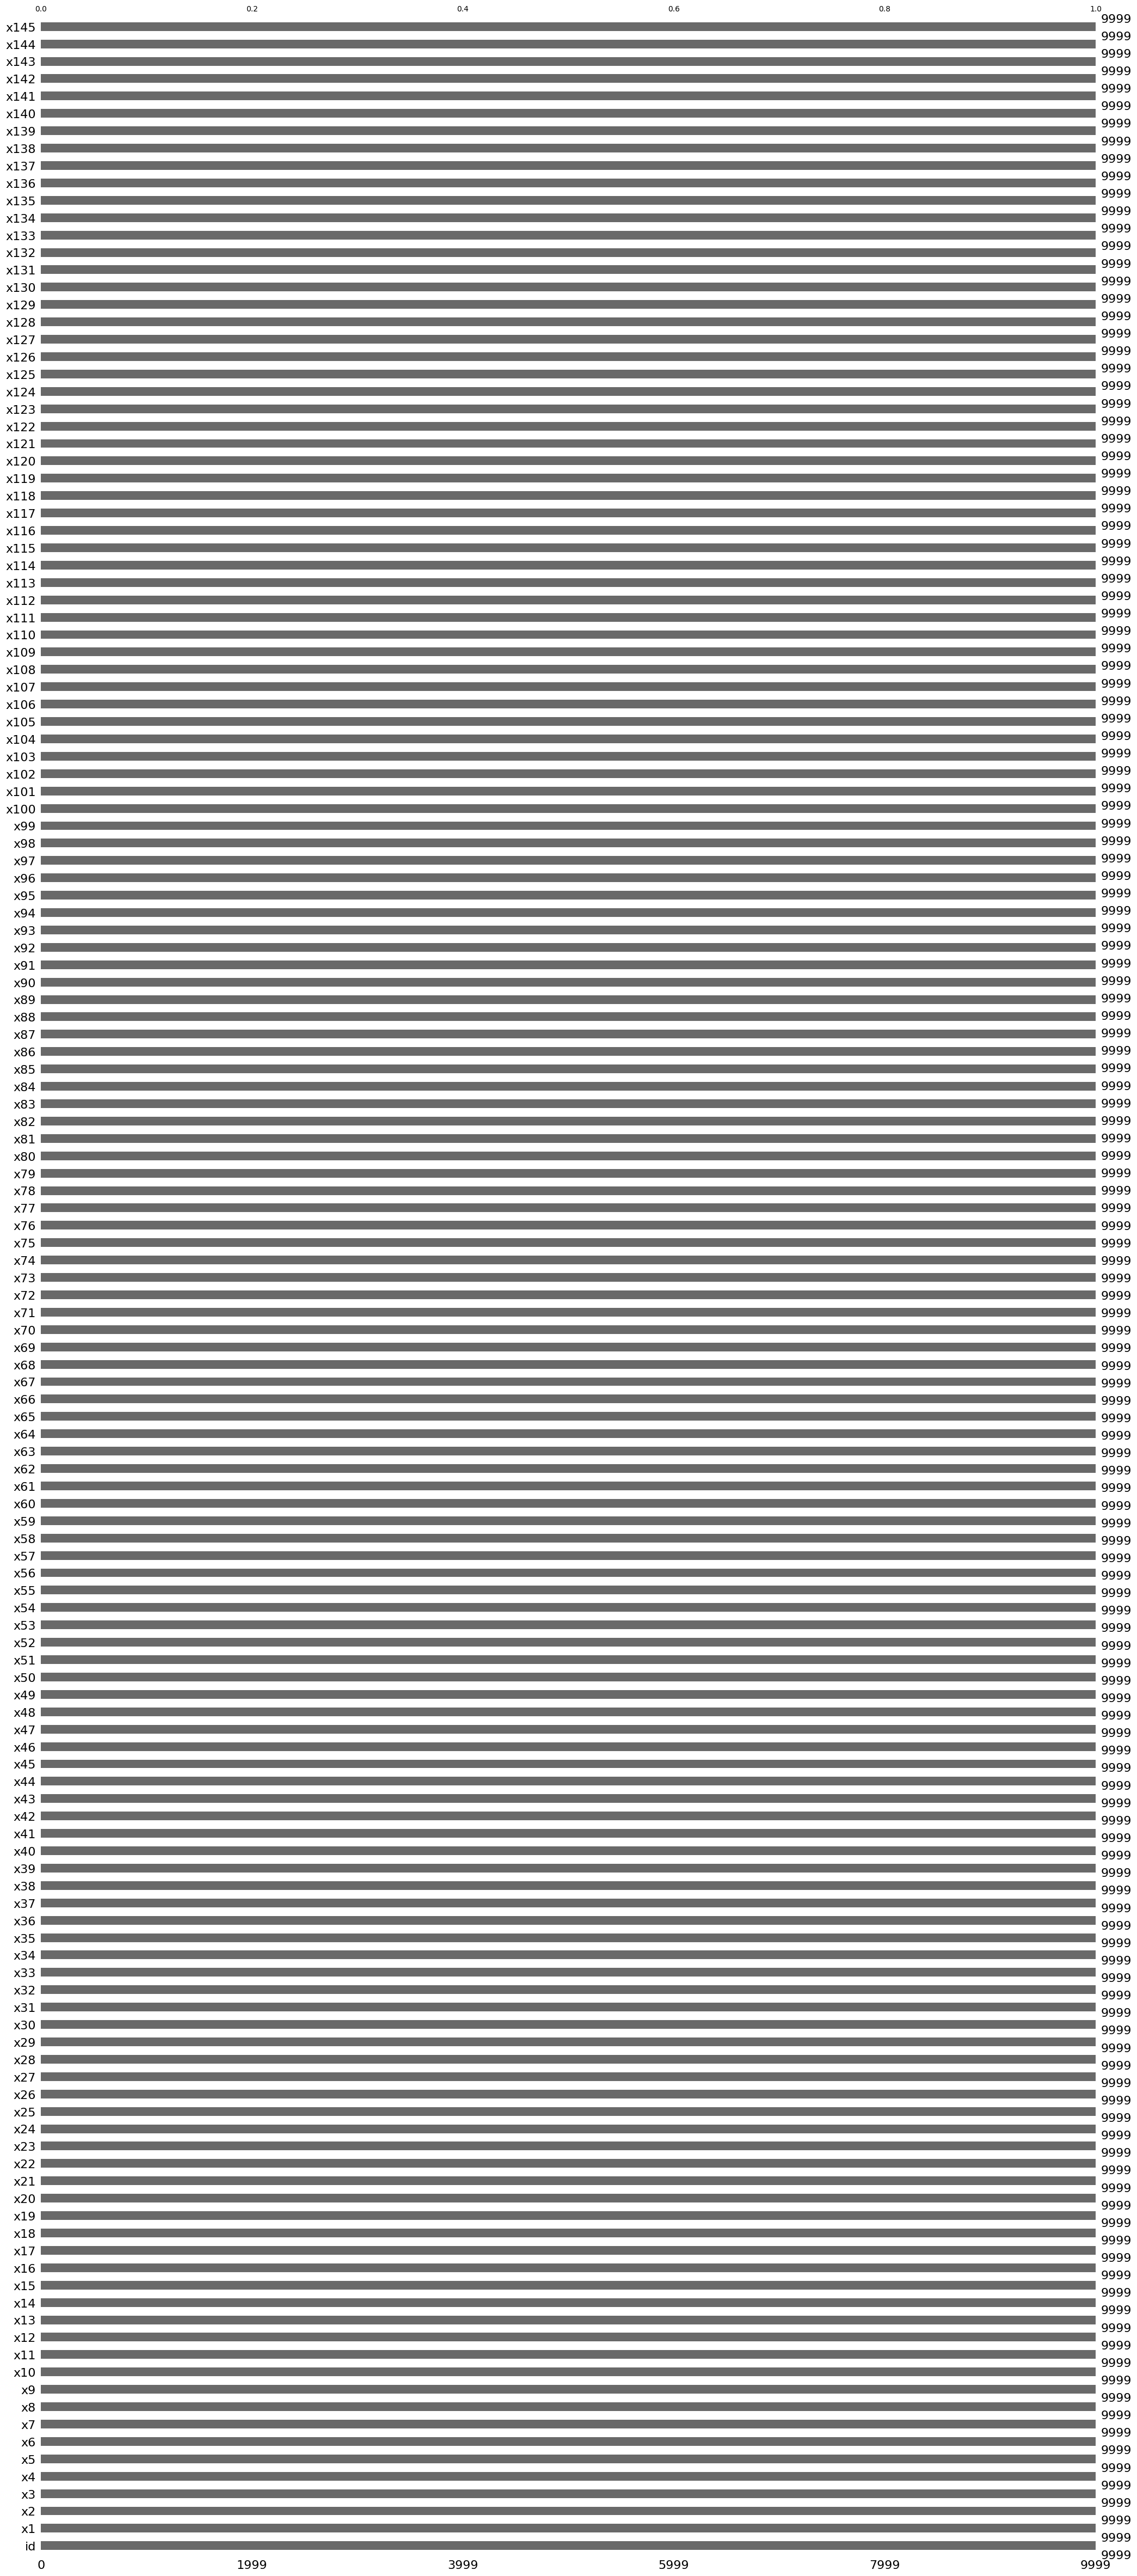

In [13]:
miss.bar(train)

Conclusion: Our train data is now NaN-free!

In [14]:
# sanity check

train.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


# Performing feature-vectorizer

### tfidf of categorical data

In [15]:
train2 = train
for feature in cat_features:
    # Apply TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features = 2)
    tfidf_feature = tfidf_vectorizer.fit_transform(train2[feature])
    train2 = train2.drop(columns=[feature])
    train2 = pd.concat([pd.DataFrame(tfidf_feature.toarray()), train2], axis=1)

In [16]:
train2.head()    

,0,1,0,1,0,1,0,1,0,1,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5,6,0.987596,0.0,0.810,3306,4676,2,0.375535,0.464610
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4,6,0.968240,0.0,0.510,4678,3306,4,0.741682,0.593630
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3,5,0.966122,0.0,0.850,4678,3306,1,0.776467,0.493159
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,17,15,0.927550,0.0,0.945,3306,4678,3,0.168234,0.546582
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,11,11,0.900224,0.0,1.000,1263,892,1,0.246637,0.361045


In [17]:
# standardising the above dataframe

from sklearn.preprocessing import StandardScaler
train2.columns = train2.columns.astype(str)
std = StandardScaler()
train3 = std.fit_transform(train2)

final_train = pd.DataFrame(train3)

In [18]:
# this is our final train data, on which we intend to train our model

final_train.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,-0.934813,0.934813,0.14859,-0.14859,-0.949565,0.949565,0.528797,-0.528797,0.160465,-0.160465,...,-0.566444,-0.425390,0.769844,-0.037165,-0.968699,0.400915,1.826982,-0.151420,-0.531420,-0.157912
1,-0.934813,0.934813,0.14859,-0.14859,-0.949565,0.949565,0.528797,-0.528797,0.160465,-0.160465,...,-0.698435,-0.425390,0.492993,-0.037165,-3.500558,1.264818,0.838876,0.030164,0.820313,0.345462
2,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,0.528797,-0.528797,0.160465,-0.160465,...,-0.830426,-0.577267,0.462709,-0.037165,-0.631118,1.264818,0.838876,-0.242212,0.948733,-0.046525
3,-0.934813,0.934813,0.14859,-0.14859,1.053114,-1.053114,0.528797,-0.528797,0.160465,-0.160465,...,1.017449,0.941505,-0.088967,-0.037165,0.170637,0.400915,1.828425,-0.060628,-1.296726,0.161904
4,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,0.528797,-0.528797,0.160465,-0.160465,...,0.225503,0.333996,-0.479803,-0.037165,0.634811,-0.885495,-0.902211,-0.242212,-1.007282,-0.561971


# Reading trainLabels

In [19]:
train_labels = pd.read_csv('A:\\gibots\\trainLabels.csv')
print('Shape:',train_labels.shape)
train_labels.head()

Shape: (49999, 34)


,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# slicing train labels to obtain the required train labels for the given 9,999 train data

temp = train_labels[:9999]
y = temp.drop(['id'], axis =1)
y

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data splitting

Data is split here into two : training (X_tr, y_tr) and cross-validation (X_cv, y_cv).

Training one is used for training the model.

CV is used to evaluate the model's peformance.

In [21]:
from sklearn.model_selection import train_test_split

X_tr, X_cv, y_tr, y_cv = train_test_split(final_train, y, test_size = 0.1) # performing 90-10 split

## Building the model

In [22]:
from sklearn.ensemble import RandomForestClassifier   # the model
from sklearn.model_selection import GridSearchCV        # for hyperparameter tuning

In [23]:
params = {'n_estimators' : [100, 500], 'max_depth' : [15, 20]}
model = RandomForestClassifier()
clf = GridSearchCV(model,params, cv= 3, scoring='f1_micro', return_train_score=True, n_jobs = -1)
clf.fit(X_tr, y_tr)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'n_estimators': [100, 500]},
             return_train_score=True, scoring='f1_micro')

In [24]:
print(f'Best hyperparameters obtained: {clf.best_params_}')

Best hyperparameters obtained: {'max_depth': 20, 'n_estimators': 500}


In [25]:
# fitting model with best hyperparameters

model2 = RandomForestClassifier(n_estimators = 500, max_depth= 20)
model2.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=20, n_estimators=500)

In [26]:
# performing predictions on train and CV data

pred_tr = model2.predict(X_tr)
pred_cv = model2.predict(X_cv)

acc_tr = accuracy_score(y_tr, pred_tr)
f1_tr = f1_score(y_tr, pred_tr, average='micro')

acc_cv = accuracy_score(y_cv, pred_cv)
f1_cv = f1_score(y_cv, pred_cv, average='micro')

In [27]:
# Evaluation report

print(f'Model evaluation on training data:\nAccuracy Score : {acc_tr}\nF1 Score : {f1_tr}\n')
print(f'Model evaluation on CV data:\nAccuracy Score : {acc_cv}\nF1 Score : {f1_cv}')


Model evaluation on training data:
Accuracy Score : 0.9978886542949217
F1 Score : 0.9988096419006051

Model evaluation on CV data:
Accuracy Score : 0.742
F1 Score : 0.8103277060575969


## Reading test data

In [28]:
test = pd.read_csv('A:\\gibots\\test.csv',  names = train.columns)
print(test.shape)
test.head()

(2000, 146)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.414798,0.000000,1.000000,0.000000,0.202060,...,0.0,1.000000,1262,892,NO,NO,NO,0,0.089686,0.193344
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
3,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909


In [29]:
# checking test data for missing values

test.isna().sum()

id        0
x1      294
x2      294
x3      294
x4      294
       ... 
x141      0
x142      0
x143      0
x144      0
x145      0
Length: 146, dtype: int64

<Axes: >

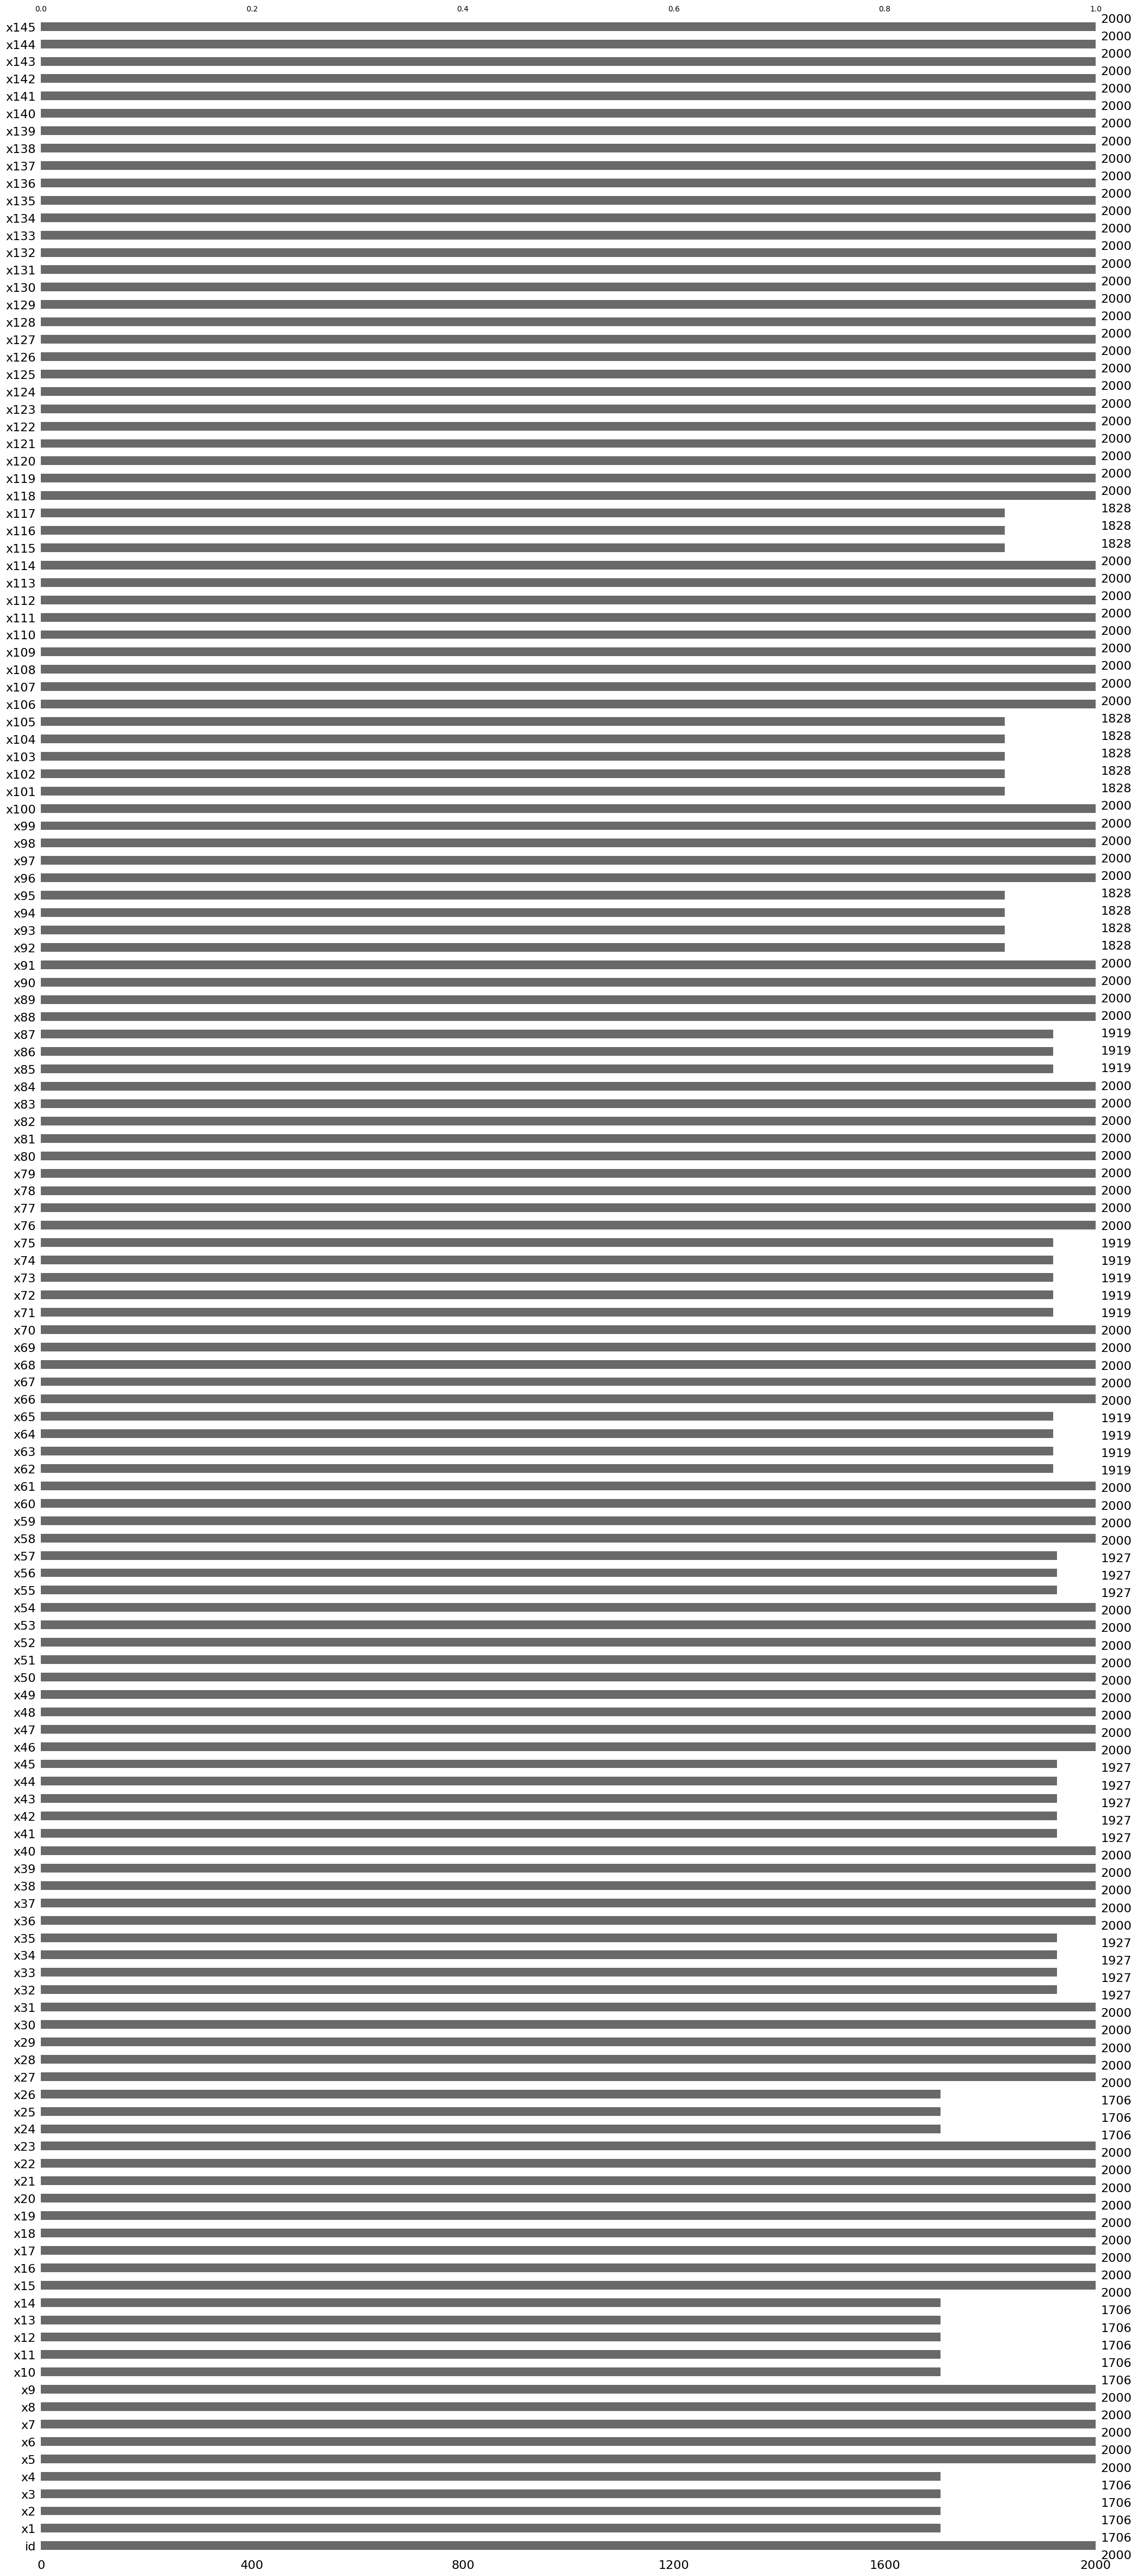

In [30]:
miss.bar(test)

We have got sizable amount of NaNs. Dropping them is not the right option as it would lead to loss of data. Let's handle them appropriately.

In [31]:
# getting categorical features

test_cat = test.select_dtypes(include=['object'])
test_cat

,x1,x2,x3,x4,x10,x11,x12,x13,x14,x24,...,x116,x117,x126,x127,x128,x129,x130,x140,x141,x142
0,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,NO,NO,NO,NO,NO,NO,...,NaN,NaN,NO,NO,NO,NO,NO,NO,NO,NO
1,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,YES,NO,NO,NO,NO,YES,...,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO
2,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,NO,NO,YES,YES,YES,NO,...,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES
4,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,NO,NO,NO,NO,NO,NO,...,NO,NO,YES,NO,YES,NO,YES,YES,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NO,NO,Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=,yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=,YES,NO,NO,NO,NO,YES,...,NO,YES,YES,NO,NO,NO,YES,YES,NO,YES
1996,NO,NO,LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=,h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=,YES,NO,NO,NO,NO,YES,...,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES
1997,NO,NO,/tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=,aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1998,NO,NO,uMIU2KDOxlgzhYToCFCa3nMxIOPV0WqCnKWfooGaw+8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,NO,NO,YES,NO,NO,NO,...,NO,YES,YES,NO,YES,NO,YES,NO,NO,NO


We have 60 features which are categorical

In [32]:
# checking for NaNs in test categorical features

test_cat.isna().sum()

x1      294
x2      294
x3      294
x4      294
x10     294
x11     294
x12     294
x13     294
x14     294
x24     294
x25     294
x26     294
x30       0
x31       0
x32      73
x33      73
x34      73
x35      73
x41      73
x42      73
x43      73
x44      73
x45      73
x55      73
x56      73
x57      73
x61       0
x62      81
x63      81
x64      81
x65      81
x71      81
x72      81
x73      81
x74      81
x75      81
x85      81
x86      81
x87      81
x91       0
x92     172
x93     172
x94     172
x95     172
x101    172
x102    172
x103    172
x104    172
x105    172
x115    172
x116    172
x117    172
x126      0
x127      0
x128      0
x129      0
x130      0
x140      0
x141      0
x142      0
dtype: int64

<Axes: >

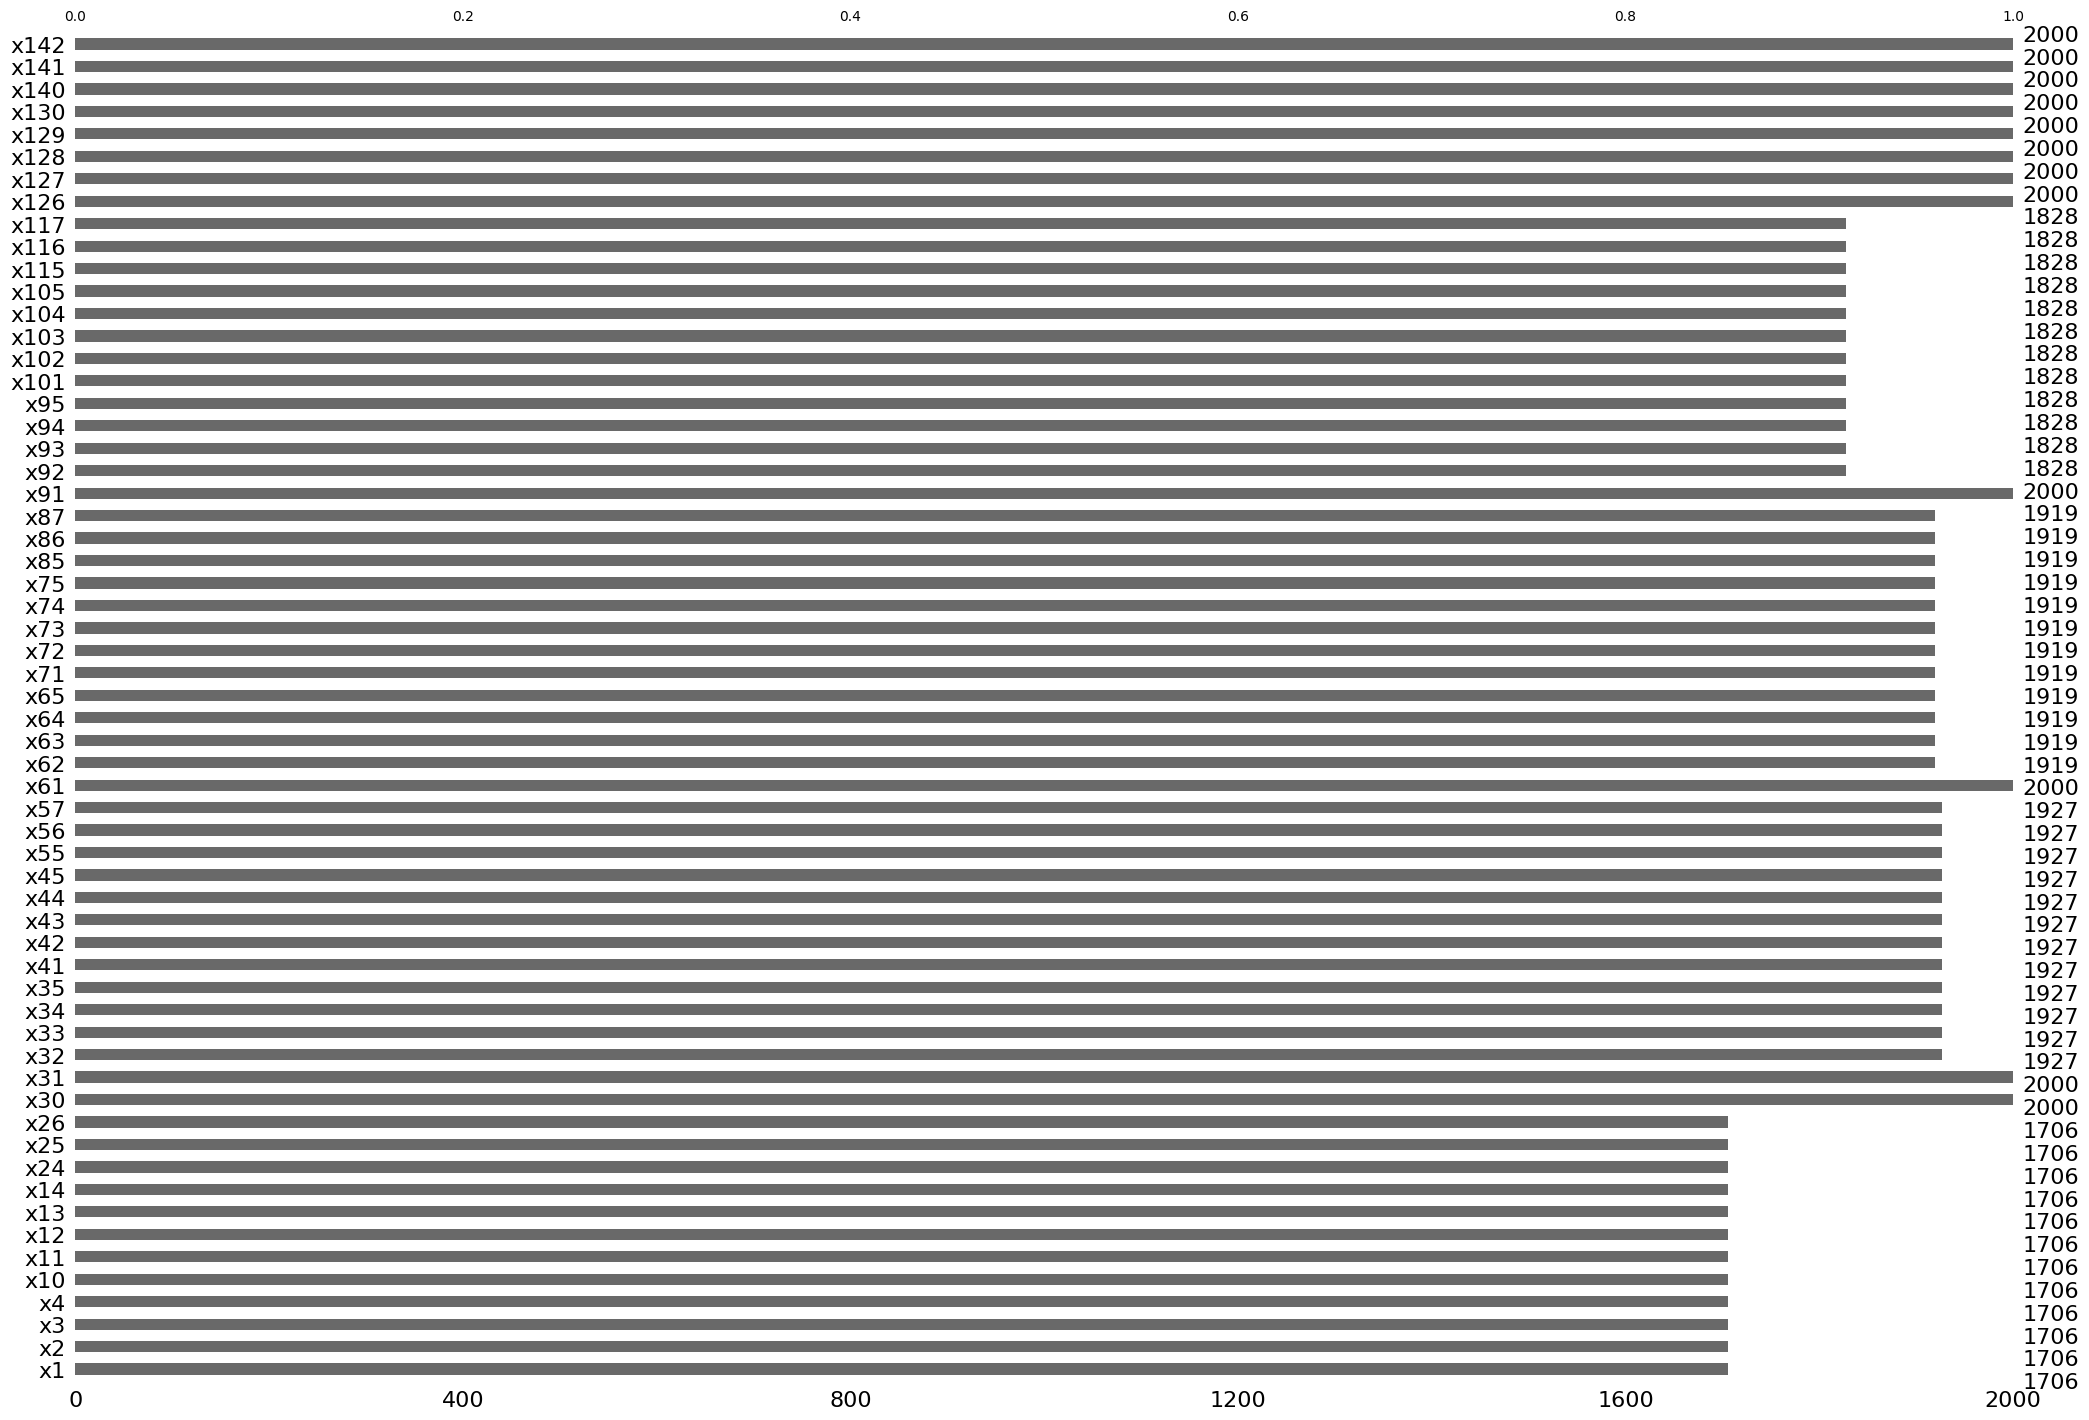

In [33]:
miss.bar(test_cat)

In [34]:
# getting numerical features

test_num = test.select_dtypes(exclude=['object'])
test_num

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
0,1698001,1.414798,0.000000,1.000000,0.000000,0.202060,4,0.096413,28,2,...,6,2,0.963004,0.0,1.000000,1262,892,0,0.089686,0.193344
1,1698002,0.832679,0.049834,0.945938,0.317427,0.482021,3,0.895500,6,7,...,17,7,0.876992,1.0,0.866667,4672,3311,5,0.945032,0.471318
2,1698003,1.415919,0.000000,1.000000,0.000000,0.703088,4,0.536996,2,10,...,9,10,0.919283,-1.0,1.000000,1263,892,8,0.557175,0.693587
3,1698004,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,...,5,3,0.952813,0.0,0.870000,4672,3306,0,0.870538,0.405822
4,1698005,1.129212,0.087020,0.814240,1.112804,0.874318,5,0.238793,3,10,...,1,10,0.996484,0.0,0.870000,4400,3413,2,0.224729,0.870909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1699996,1.294118,0.000000,1.000000,0.000000,0.164141,4,0.174292,3,3,...,8,3,0.944444,0.0,1.000000,1188,918,2,0.198257,0.155724
1996,1699997,1.020217,0.583944,0.625842,1.003516,0.791136,2,0.583944,4,1,...,5,5,0.949604,0.0,0.720000,4400,3413,0,0.582479,0.778864
1997,1699998,0.354706,0.550882,0.930882,0.207941,0.207500,6,0.910882,4,13,...,7,13,0.972104,0.0,0.845000,4400,3400,5,0.930588,0.201591
1998,1699999,1.220588,0.102059,0.326176,1.213824,0.942955,1,0.249412,2,4,...,48,4,0.859748,1.5,0.676667,4400,3400,2,0.256471,0.938182


In [35]:
# checking for NaNs in test numerical features

test_num.isna().sum()

id      0
x5      0
x6      0
x7      0
x8      0
       ..
x138    0
x139    0
x143    0
x144    0
x145    0
Length: 86, dtype: int64

<Axes: >

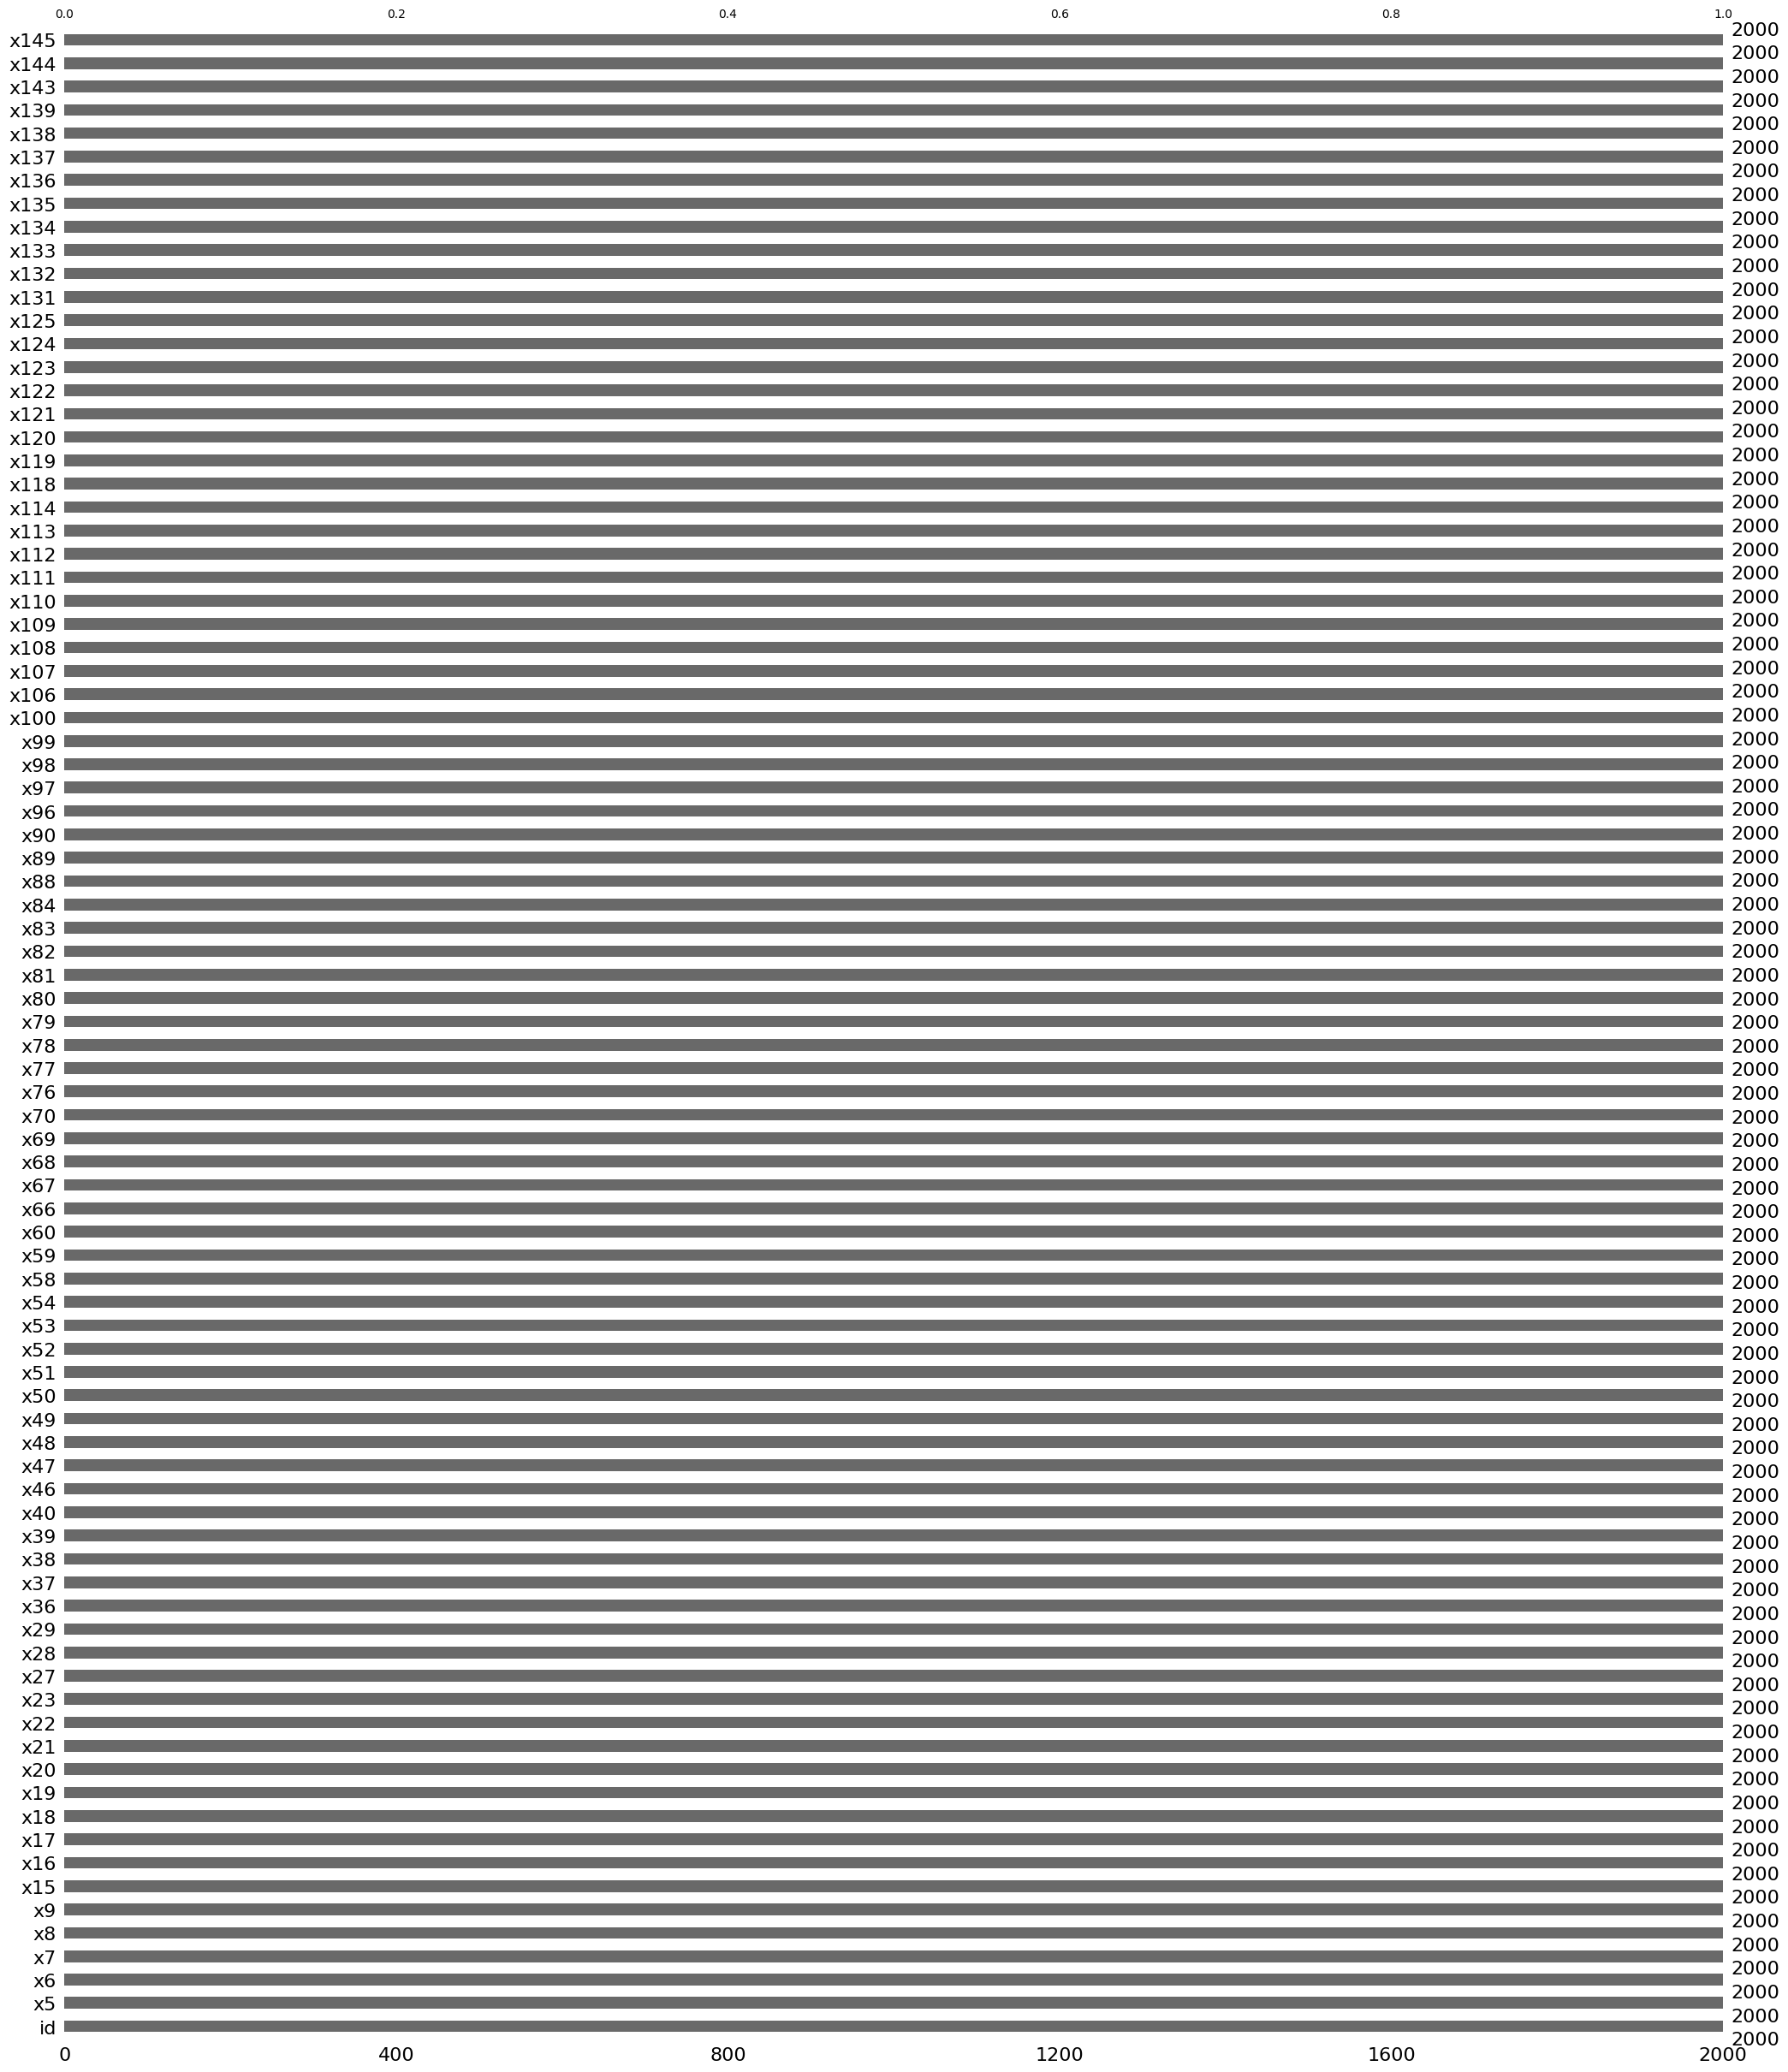

In [36]:
miss.bar(test_num)

## CONCLUSION : Missing values are present in categorical features only. Let's fill them up using modes of respective features.

In [37]:
# performing imputation by mode to fill up the missing values

for i in test_cat.columns:
  test[i] = test[i].fillna(test[i].mode()[0])

<Axes: >

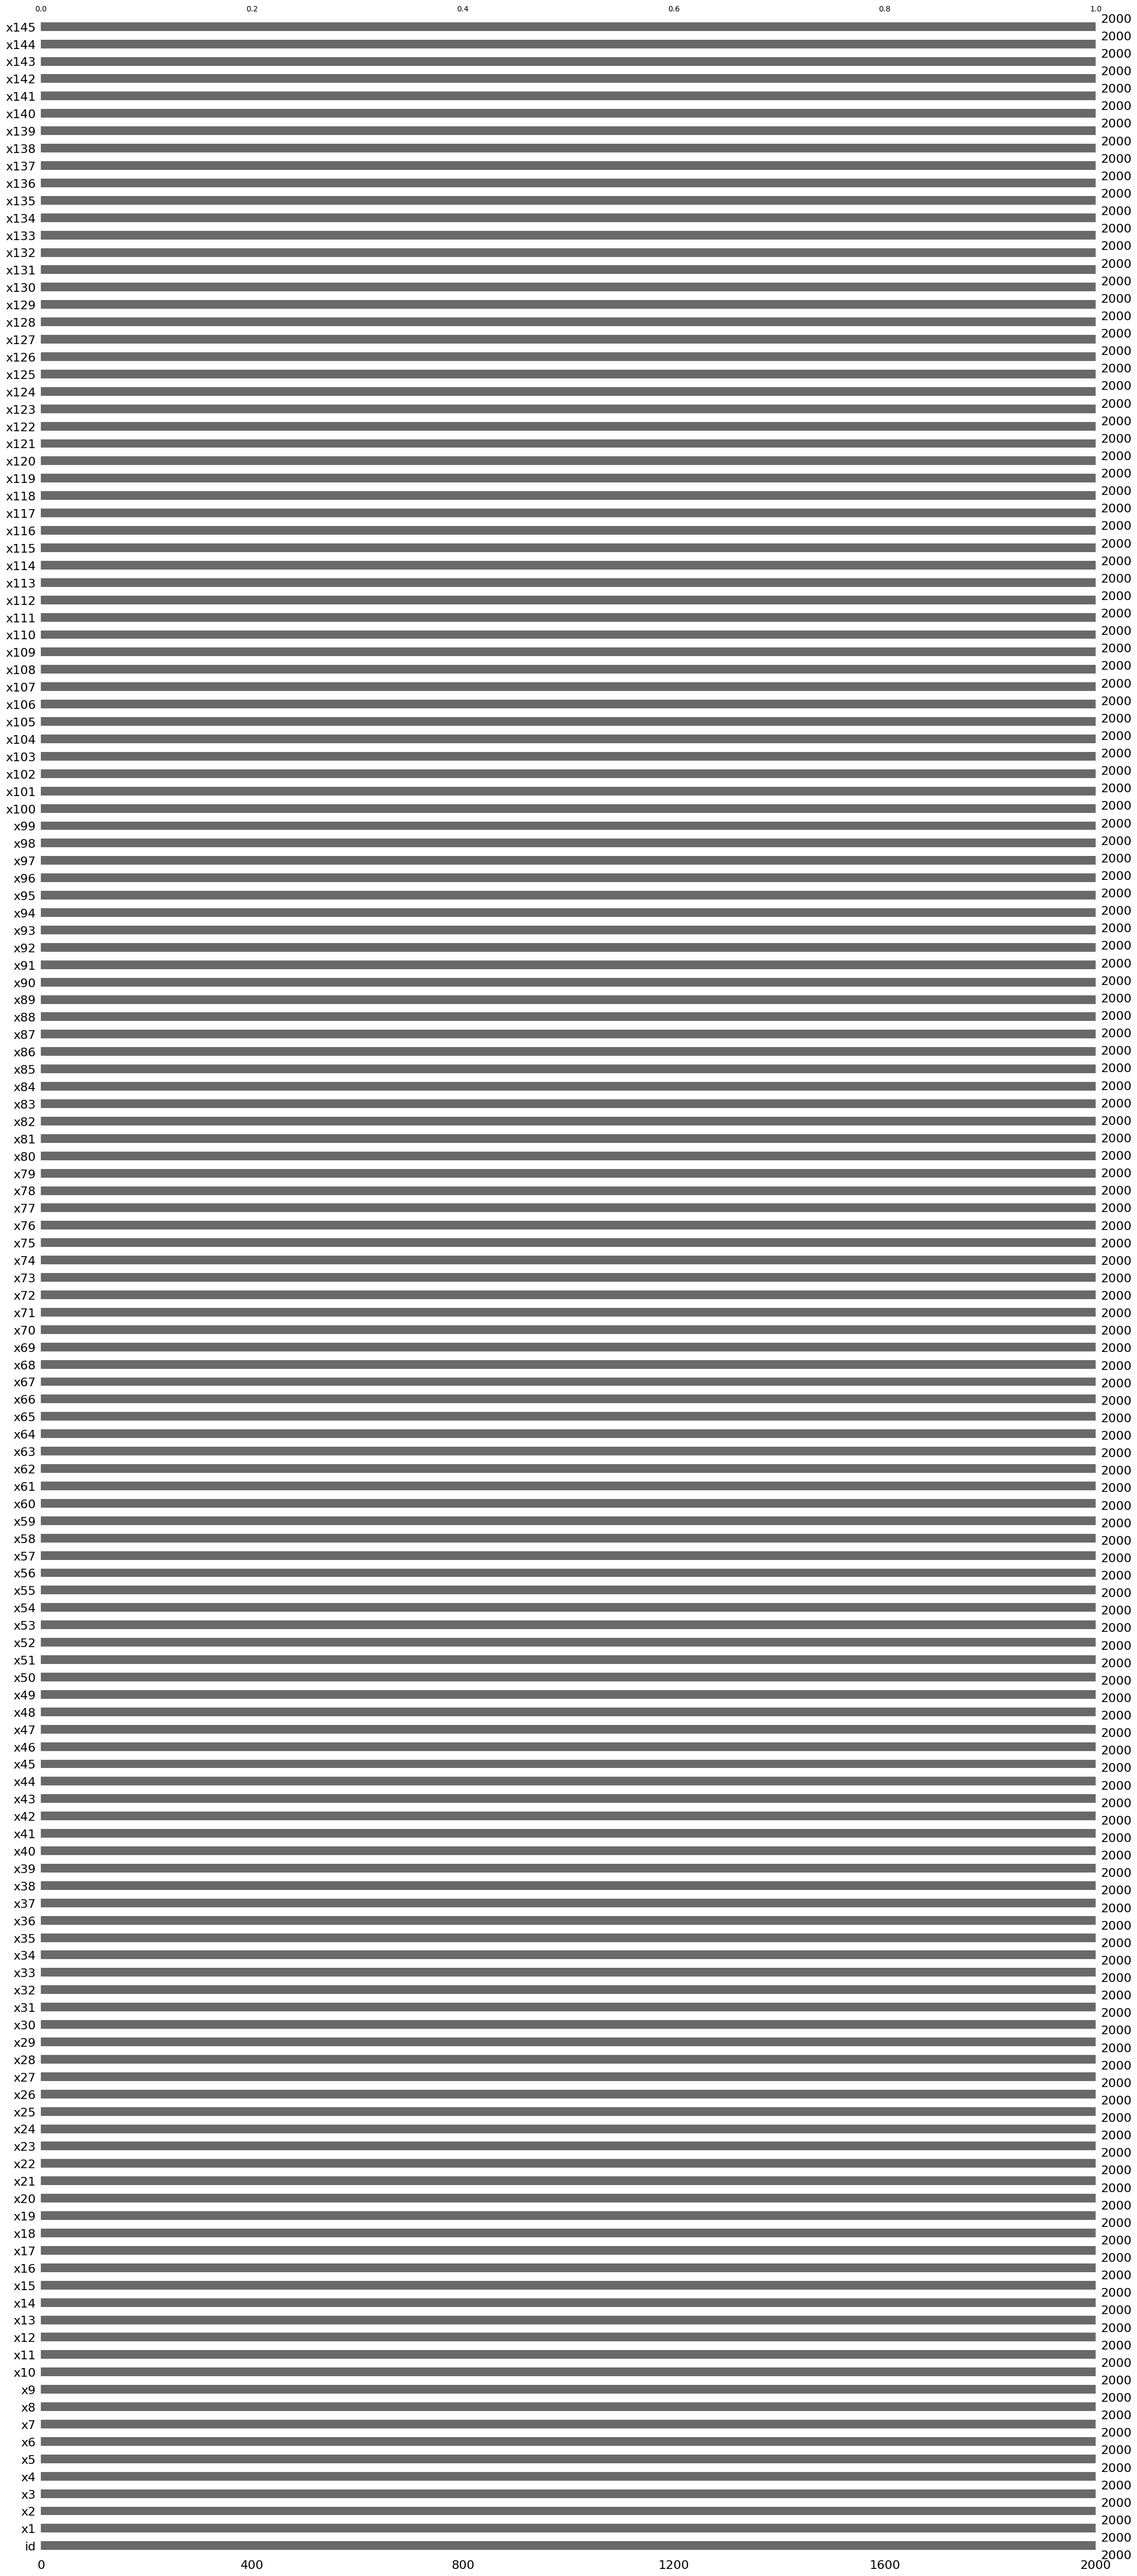

In [38]:
# checking...

miss.bar(test)

In [39]:
test

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.414798,0.000000,1.000000,0.000000,0.202060,...,0.0,1.000000,1262,892,NO,NO,NO,0,0.089686,0.193344
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
3,1698004,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1699996,NO,NO,Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=,yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=,1.294118,0.000000,1.000000,0.000000,0.164141,...,0.0,1.000000,1188,918,YES,NO,YES,2,0.198257,0.155724
1996,1699997,NO,NO,LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=,h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=,1.020217,0.583944,0.625842,1.003516,0.791136,...,0.0,0.720000,4400,3413,YES,NO,YES,0,0.582479,0.778864
1997,1699998,NO,NO,/tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=,aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=,0.354706,0.550882,0.930882,0.207941,0.207500,...,0.0,0.845000,4400,3400,NO,NO,NO,5,0.930588,0.201591
1998,1699999,NO,NO,uMIU2KDOxlgzhYToCFCa3nMxIOPV0WqCnKWfooGaw+8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.220588,0.102059,0.326176,1.213824,0.942955,...,1.5,0.676667,4400,3400,NO,NO,NO,2,0.256471,0.938182


CONCLUSION: Test data is now NaN-free!

## tfidf of categorical data

In [40]:
test2 = test
for feature in test_cat.columns:
    # Apply TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features = 2)
    tfidf_feature = tfidf_vectorizer.fit_transform(test2[feature])
    test2 = test2.drop(columns=[feature])
    test2 = pd.concat([pd.DataFrame(tfidf_feature.toarray()),test2], axis=1)

In [41]:
test2.head()

,0,1,0,1,0,1,0,1,0,1,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,6,2,0.963004,0.0,1.000000,1262,892,0,0.089686,0.193344
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,17,7,0.876992,1.0,0.866667,4672,3311,5,0.945032,0.471318
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,9,10,0.919283,-1.0,1.000000,1263,892,8,0.557175,0.693587
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5,3,0.952813,0.0,0.870000,4672,3306,0,0.870538,0.405822
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,10,0.996484,0.0,0.870000,4400,3413,2,0.224729,0.870909


In [42]:
# standardising the test data
test2.columns = test2.columns.astype(str)
test2_std = std.transform(test2)

In [43]:
# getting final test data to perform predictions

temp_test = pd.DataFrame(test2_std, columns=test2.columns)
final_test = pd.DataFrame(temp_test)

In [44]:
final_test

,0,1,0,1,0,1,0,1,0,1,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
0,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,0.528797,-0.528797,0.160465,-0.160465,...,-0.434452,-1.032898,0.418118,-0.037165,0.634811,-0.886124,-0.902211,-0.333004,-1.586709,-1.216260
1,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,0.528797,-0.528797,0.160465,-0.160465,...,1.017449,-0.273513,-0.812087,0.620360,-0.490459,1.261040,0.842482,0.120956,1.571035,-0.131738
2,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,-1.891085,1.891085,-6.231906,6.231906,...,-0.038479,0.182119,-0.207220,-0.694690,0.634811,-0.885495,-0.902211,0.393333,0.139155,0.735445
3,-0.934813,0.934813,0.14859,-0.14859,-0.949565,0.949565,0.528797,-0.528797,0.160465,-0.160465,...,-0.566444,-0.881021,0.272354,-0.037165,-0.462328,1.261040,0.838876,-0.333004,1.296023,-0.387274
4,-0.934813,0.934813,0.14859,-0.14859,-0.949565,0.949565,-1.891085,1.891085,0.160465,-0.160465,...,-1.094408,0.182119,0.896963,-0.037165,-0.462328,1.089771,0.916049,-0.151420,-1.088161,1.427271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.934813,0.934813,0.14859,-0.14859,-0.949565,0.949565,-1.891085,1.891085,0.160465,-0.160465,...,-0.170470,-0.881021,0.152661,-0.037165,0.634811,-0.932720,-0.883459,-0.151420,-1.185889,-1.363035
1996,-0.934813,0.934813,0.14859,-0.14859,-0.949565,0.949565,0.528797,-0.528797,0.160465,-0.160465,...,-0.566444,-0.577267,0.226463,-0.037165,-1.728257,1.089771,0.916049,-0.333004,0.232571,1.068154
1997,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,0.528797,-0.528797,0.160465,-0.160465,...,-0.302461,0.637750,0.548266,-0.037165,-0.673316,1.089771,0.906673,0.120956,1.517713,-1.184084
1998,1.069733,-1.069733,0.14859,-0.14859,1.053114,-1.053114,-1.891085,1.891085,0.160465,-0.160465,...,5.109173,-0.729144,-1.058720,0.949122,-2.093970,1.089771,0.906673,-0.151420,-0.970978,1.689737


In [45]:
# performing predictions on test data

test_preds = model2.predict(final_test)
test_preds

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [46]:
print('Shape of predictions:',test_preds.shape)

Shape of predictions: (2000, 33)


In [47]:
# getting predictions in the form of a dataframe

test_id = test['id'].values
label_columns = train_labels.columns

pred_df = pd.DataFrame(test_preds, columns= y.columns)

In [48]:
pred_df

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# adding a new column 'id' into prediction-dataframe

pred_df = pd.concat([pd.DataFrame(test_id, columns=['id']), pred_df], axis=1)

In [50]:
pred_df

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1698001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1698002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1698003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1698004,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1698005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1699996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,1699997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,1699998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,1699999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# preparing the column 'id_label' for submission dataframe

label_id = []

for i in pred_df['id'].values:
  for j in y.columns.values:
    label_id.append(str(i)+'_'+j)

In [52]:
len(label_id)

66000

In [53]:
pred_df_temp = pred_df.drop(['id'], axis = 1)

In [54]:
pred_df_temp

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# preparing the column 'pred' for submission dataframe

pred = []

for i in range(0,2000):
  for j in range(0,33):
    value = pred_df_temp.iloc[i][j]
    pred.append(value)

len(pred)

C:\Users\Naman\AppData\Local\Temp\ipykernel_7584\1591080418.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = pred_df_temp.iloc[i][j]


66000

In [56]:
# getting the required submission dataframe

submission = pd.DataFrame({'id_label':label_id,
                           'pred':pred})
submission

,id_label,pred
0,1698001_y1,0
1,1698001_y2,0
2,1698001_y3,0
3,1698001_y4,0
4,1698001_y5,0
...,...,...
65995,1700000_y29,0
65996,1700000_y30,0
65997,1700000_y31,0
65998,1700000_y32,0


In [57]:
# saving the output

submission.to_csv('A:\\gibots\\submission.csv', index=False)